## Facial Expressions Recognition using Deep Convolutional Neural Networks

###  Testing the model

In [26]:
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

from keras import backend as K
K.set_image_dim_ordering('tf')

In [27]:
from keras.models import load_model
model = load_model('FERModel2.h5')

In [28]:
with open("/home/pradeep/Downloads/all/fer2013/fer2013.csv") as f:
    content = f.readlines()

In [29]:
 num_of_instances = 35888

In [39]:
x_train,y_train,x_test,y_test,y_test_cm = [],[],[],[],[]
for i in range(1,num_of_instances):
    try:
        emotion,img,usage = lines[i].split(",")
        val = img.split(" ")
        pixels = np.array(val,'float32')
        emotion2 = emotion
        emotion = keras.utils.to_categorical(emotion,num_classes)
        
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
            y_test_cm.append(emotion2)
    except:
        print("E",end="")

In [40]:
x_test = np.array(x_test,'float32')
y_test = np.array(y_test,'float32')
y_test_cm = np.array(y_test_cm,'float32')
print(x_test.shape)
print(y_test.shape)
x_test /= 255
x_test = x_test.reshape(x_test.shape[0],48,48,1)
x_test = x_test.astype('float32')

(3589, 2304)
(3589, 7)


### Finding test Accuracy

In [41]:
test_score = model.evaluate(x_test, y_test, verbose=0)
test_score

[1.2458275486480297, 0.5383115073919761]

In [42]:
predictions = model.predict_classes(x_test, verbose=1)
predictions = np.array(predictions,'float32')

3589/3589 [==============================] - 3s 925us/step


In [46]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test_cm,predictions)
print(cmat)

[[272   3  23  33  88  25  23]
 [ 32  10   0   1  10   2   1]
 [100   3  72  27 158  89  47]
 [ 72   0  13 646  71  33  60]
 [129   4  34  38 342  33  73]
 [ 28   1   6  18  17 333  12]
 [ 97   2  17  47 161  26 257]]


### Plotting Confusion Matrix for Visualization of Results

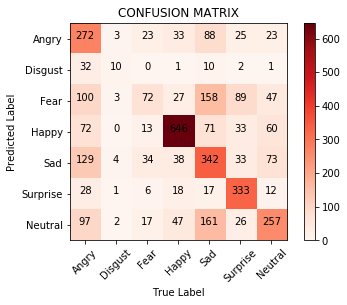

In [59]:
import matplotlib.pyplot as plt
import itertools
'''plt.matshow(cmat)
plt.colorbar()'''
classes = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']
plt.imshow(cmat, interpolation='nearest', cmap=plt.cm.Reds)
plt.title("CONFUSION MATRIX")
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.colorbar()
tickmarks = np.arange(len(classes))
plt.xticks(tickmarks,classes,rotation = 45)
plt.yticks(tickmarks,classes)
for i,j in itertools.product(range(cmat.shape[0]),range(cmat.shape[1])):
    plt.text(j,i,format(cmat[i,j]),horizontalalignment='center')
#plt.tight_layout()

<div style="color:blue;"><h4>Implemented By<br/><br/>Pradeep Pai (4JC15CS077)<br/>Under the guidance of Prof. Brunda S</h3></div>